In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
style.use('ggplot')
import os
import cv2
import csv
import sklearn
import pandas as pd
import sklearn.metrics as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [2]:
%matplotlib inline

In [3]:
img = mpimg.imread ('D:/whitefly v2/005.jpg')
print(img)

[[[167 172 108]
  [176 180 119]
  [198 201 146]
  ...
  [177 183 137]
  [185 189 152]
  [195 199 162]]

 [[156 160  99]
  [168 172 113]
  [183 186 131]
  ...
  [185 193 142]
  [195 200 159]
  [204 209 168]]

 [[158 163 107]
  [178 183 127]
  [182 186 135]
  ...
  [163 172 115]
  [172 179 127]
  [182 189 137]]

 ...

 [[ 82 114  90]
  [ 56  88  64]
  [ 74 106  82]
  ...
  [  3   6   0]
  [  5   9   0]
  [ 78  82  65]]

 [[ 84 116  92]
  [ 71 103  79]
  [ 87 119  95]
  ...
  [  9  13   0]
  [  7  11   0]
  [ 68  73  53]]

 [[ 71 105  80]
  [ 80 114  89]
  [ 90 124  99]
  ...
  [ 85  89  72]
  [ 80  85  63]
  [129 134 111]]]


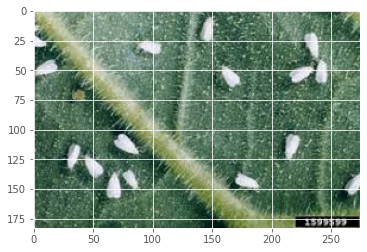

In [4]:
imgplot = plt.imshow(img)

In [5]:
A=img/255
plt.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
ish=A.shape
X=np.zeros((ish[0]*ish[1],4),np.float32)
temp_1=np.zeros((ish[0],ish[1]),np.float32)
for i in range(0,ish[0],1):
    for j in range(0,ish[1],1):
        temp_1[i,j]=(i+j)/450

In [7]:
temp_1=np.reshape(temp_1,(ish[0]*ish[1]))        
A_new=np.reshape(A,(ish[0]*ish[1],ish[2]))

In [8]:
X[:,0:3]=A_new
X[:,3]=temp_1

In [9]:
X_1=np.float32(X)
criteria = (cv2.TERM_CRITERIA_MAX_ITER, 60, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
ret,labels,centers = cv2.kmeans(X_1,6,None,criteria,60,flags)

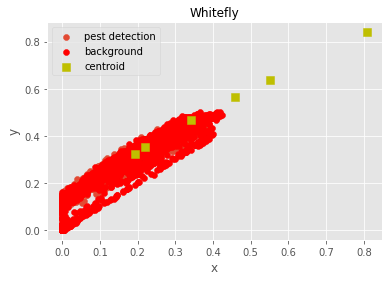

In [16]:
A = X_1[labels.ravel()==0]
B = X_1[labels.ravel()==1]

#Plot the data
plt.title('Whitefly', loc='center', fontsize=12)
#plt.legend(handles=legend_elements, loc='upper right')
plt.scatter(A[:,0],A[:,1],label = "pest detection")
plt.scatter(B[:,0],B[:,1],c = 'r',label = "background")
plt.scatter(centers[:,0],centers[:,1],s = 80,c = 'y', marker = 's', label = "centroid")
plt.legend(loc="upper right")
plt.xlabel('x'),plt.ylabel('y'), plt.legend()
plt.show()

In [21]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [22]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)

In [23]:
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 4])

In [24]:
kmeans.cluster_centers_

array([[0.34082997, 0.46709627, 0.37139806, 0.44382405],
       [0.55205995, 0.6380874 , 0.5380815 , 0.24949312],
       [0.21853183, 0.3490522 , 0.25146264, 0.7267245 ],
       [0.80616724, 0.83866525, 0.81620395, 0.4829931 ],
       [0.45420453, 0.56075704, 0.43510193, 0.69916415],
       [0.1929493 , 0.32326636, 0.24004067, 0.35876065]], dtype=float32)

In [25]:
print(confusion_matrix, kmeans.labels_)

<function confusion_matrix at 0x00000248B3B7B9D8> [1 1 1 ... 2 2 4]


In [26]:
for i in range(0,len(centers),1):
    err=centers[i,0:3]-[0,1,0]
    err=np.sum(np.multiply(err,err))
    if err<0.6:
        centers[i,:]=0

In [27]:
centers=np.uint8(centers*255)

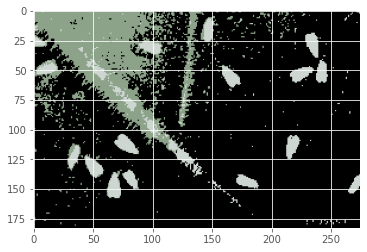

In [28]:
centers=centers[:,0:3]
res = centers[labels.flatten()]
res2 = np.reshape(res,(ish[0],ish[1],ish[2]))
plt.imshow(res2)

In [29]:
X_out=res2

X_out2=np.uint8(X_out*255)

img2=cv2.cvtColor(X_out2,cv2.COLOR_BGR2GRAY)

kernel = np.ones((10,10), np.uint8)

ret, thresh = cv2.threshold(img2,0,1,cv2.THRESH_BINARY)

In [30]:
connectivity = 4
output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
num_labels = output[0]
labels = output[1]
centroids = output[3]

In [31]:
list_new=[]
for i in range(0,num_labels,1):
    list1=np.equal(labels,i)            
    if (np.sum(np.sum(list1))>100):
        list_new.append(i)

In [32]:
shape=np.shape(img2)
for i in range(0,shape[0]):
    for j in range(0,shape[1]):
        if (labels[i,j] in list_new[1:])!= True:
            X_out[i,j,:]=0

In [33]:
X_out2=np.uint8(X_out*255)

In [34]:
img2=cv2.cvtColor(X_out2,cv2.COLOR_BGR2GRAY)

In [35]:
kernel = np.ones((10,10), np.uint8)

In [36]:
ret, thresh = cv2.threshold(img2,0,1,cv2.THRESH_BINARY)

In [37]:
thresh = cv2.dilate(thresh, kernel, iterations=2)
thresh = cv2.erode(thresh,kernel,iterations=3)

In [38]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

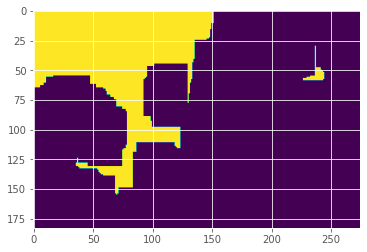

In [39]:
plt.imshow(thresh)

In [40]:
connectivity = 4
output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)

In [41]:
num_labels = output[0]
labels = output[1]
centroids = output[2]

In [42]:
list_new=[]
for i in range(0,num_labels,1):
    list1=np.equal(labels,i)            
    if (np.sum(np.sum(list1))>600):
        list_new.append(i)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x248bc853688>)

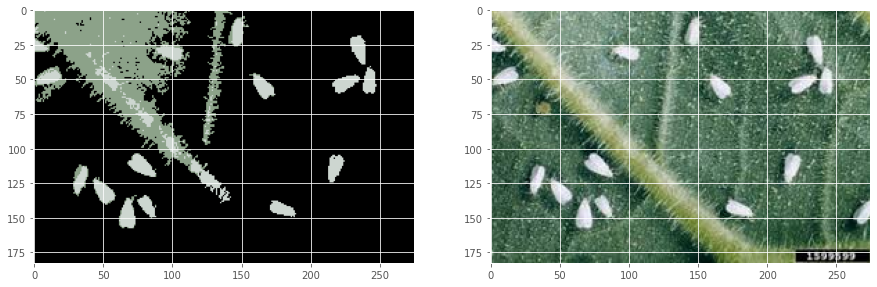

In [43]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(res2)
plt.subplot(1,2,2),plt.imshow(mpimg.imread('D:/whitefly v2/005.jpg'))

In [44]:
n=len(list_new)
shape=np.shape(img2)

In [45]:
print(list_new)
list1=np.zeros((n,4),np.int64)
list1[:,0]=shape[0]
list1[:,2]=shape[1]

[0, 1]


In [46]:
for i in range(0,shape[0]-1,1):
    for j in range(0,shape[1]-1,1):
        if ((labels[i,j] in list_new)==True and (labels[i,j]!=0)):
            b=np.argmax(np.equal(list_new,labels[i,j]))
            if list1[b,0]>i:
                list1[b,0]=i
            elif list1[b,1]<i:
                list1[b,1]=i
            if list1[b,2]>j:
                list1[b,2]=j
            elif list1[b,3]<j:
                list1[b,3]=j

In [47]:
for j in range(1,n,1):
 filter1=np.zeros((shape[0],shape[1],3),np.float64)
 filter1[:,:,0]=np.equal(labels,list_new[j])
 filter1[:,:,1]=np.equal(labels,list_new[j])
 filter1[:,:,2]=np.equal(labels,list_new[j])

In [48]:
plt.figure(j+1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [49]:
imb=np.multiply(X_out/255,filter1)
im=img/255

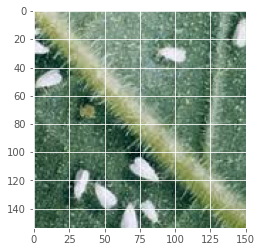

In [50]:
plt.imshow(im[list1[j,0]:list1[j,1],list1[j,2]:list1[j,3],:])

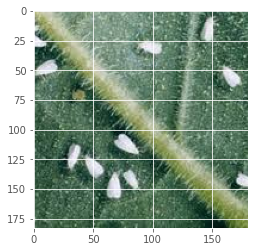

In [51]:
plt.imshow(im[max(0,list1[j,0]-10):min(shape[0],list1[j,1]+30),max(0,list1[j,2]-30):min(shape[1],list1[j,3]+30),:])

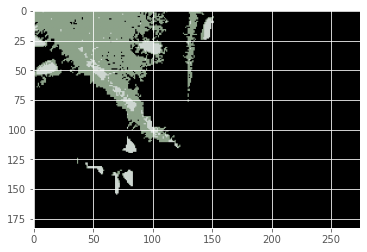

In [52]:
plt.imshow(imb)

In [53]:
print(list1)

[[183   0 275   0]
 [  0 154   0 151]]


In [54]:
#Extract features from an arbitrary intermediate layer with VGG19
#model = VGG19()
input_images=np.zeros((n-1,224,224,3),np.float64)
print(n)
X_out=X_out*255

2


In [55]:
f1=np.zeros((shape[0],shape[1],3))
f1[:,:,1]=thresh
f1[:,:,2]=thresh
f1[:,:,0]=thresh
im=np.multiply(img,f1)

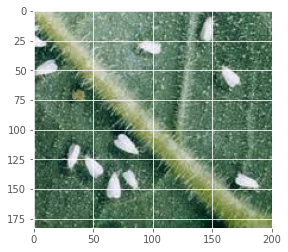

In [56]:
for j in range(1,n,1):
     im=img
     plt.imshow(im[list1[j,0]:list1[j,1],list1[j,2]:list1[j,3],:])
     plt.imshow(im[max(0,list1[j,0]-50):min(shape[0],list1[j,1]+50),max(0,list1[j,2]-50):min(shape[1],list1[j,3]+50),:])
     img_test=im[max(0,list1[j,0]-25):min(shape[0],list1[j,1]+25),max(0,list1[j,2]-25):min(shape[1],list1[j,3]+25),:]
     v=np.shape(img_test)

In [57]:
if ((v[0]<222)and(v[1]<222)):
        img_test2=np.zeros((224,224,3),np.float64)
        w=np.int(np.floor((224-v[0])/2))
        x=np.int(np.floor((224-v[1])/2))
        img_test2[w:w+v[0],x:x+v[1],:]=img_test
elif (v[0]<222):
        img_test2=np.zeros((224,v[1],3),np.float64)
        w=np.int(np.floor((224-v[0])/2))
        img_test2[w:w+v[0],:,:]=img_test
elif (v[1]<222):
        img_test2=np.zeros((v[0],224,3),np.float64)
        x=np.int(np.floor((224-v[1])/2))
        img_test2[:,x:x+v[1],:]=img_test
else:
        img_test2=img_test

In [58]:
image=cv2.resize(img_test2,(224,224))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


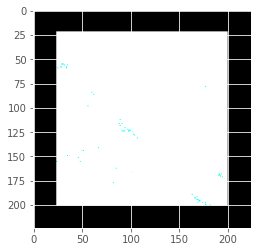

In [59]:
plt.imshow(image)

In [60]:
input_images[j-1,:,:,:]=image

In [61]:
print(np.shape(input_images))

(1, 224, 224, 3)


In [53]:
input_images1 = preprocess_input(input_images)

In [54]:
#yhat = model.predict(input_images1)

In [55]:
X_out=X_out/255

In [63]:
print(np.shape(yhat))  

(1, 1000)


In [66]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [67]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 4])

In [68]:
kmeans.predict(X)

array([1, 1, 1, ..., 0, 0, 4])

In [81]:
print(confusion_matrix,kmeans.labels_)

<function confusion_matrix at 0x00000230801BBEE8> [1 1 1 ... 0 0 4]


In [88]:
X, y = make_classification (n_samples=100, n_informative=2, n_classes=2, n_clusters_per_class=2, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, train_size=80, random_state=60)

In [89]:
clf = SVC(random_state=60)
clf.fit(X_train, y_train)

SVC(random_state=60)

In [90]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

c:\users\aiman\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
c:\users\aiman\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


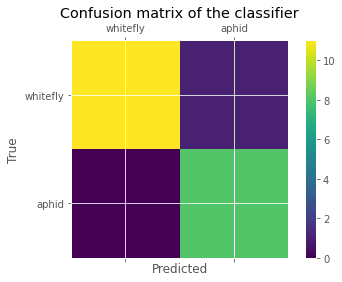

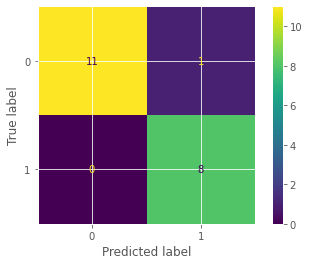

In [96]:
labels = ['whitefly', 'aphid']
#cm = confusion_matrix(y_test, y_train)
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
disp.plot()

In [98]:
target_names = ['whitefly', 'aphid']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

    whitefly       1.00      0.92      0.96        12
       aphid       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

